# Extracción de los datos

Inicialmente se importaron los archivos `.xlsx` descargados del sitio de Estadísticas de la UDG, y se renombraron para que pudiera ser más fácil su importación.

Posteriormente se hizo un proceso de estandarización de la nomenclatura de las filas y columnas para que fueran consistentes entre los diferentes archivos, ya que algunas veces las carreras eran nombradas de una forma y en algunos archivos aparecían con un nombre ligeramente distinto o utilizando abreviaciones.

In [1]:
# Importación de las librerías
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

El primer conjunto de datos que analizaremos es el correspondiente a los puntajes mínimos requeridos para ingresar a estas dos carreras en la UDG.

In [2]:
puntaje_minimo_df = pd.DataFrame()

In [5]:
for f in glob.glob('datos_udg/Puntajes_minimos_CUs_20*.xlsx'):
    df = pd.read_excel(f, header=1, usecols=[0,1,3,8])
    df.set_index(['CENTRO', 'CARRERA'], inplace=True)
    puntaje_minimo_df = puntaje_minimo_df.append(df)

In [6]:
puntaje_minimo_df

ADMITIDOS  \
CENTRO CARRERA                                                         
CUAAD  LICENCIATURA EN ARQUITECTURA                              211   
       LICENCIATURA EN DISEÑO DE INTERIORES Y AMBIENTA...         70   
       LICENCIATURA EN DISEÑO DE MODAS                            40   
       LICENCIATURA EN DISEÑO INDUSTRIAL                          75   
       LICENCIATURA EN DISEÑO PARA LA COMUNICACION GRA...        167   
...                                                              ...   
SUV    LICENCIATURA EN BIBLIOTECOLOGIA Y GESTION DEL C...         14   
       LICENCIATURA EN DESARROLLO EDUCATIVO                      135   
       LICENCIATURA EN SEGURIDAD CIUDADANA                        38   
       LICENCIATURA EN TECNOLOGIAS E INFORMACION                 133   
NaN    TOTAL CU's                                              17530   

                                                          PUNTAJE MINIMO  
CENTRO CARRERA                                                            
CUAAD  LICENCIATURA EN ARQUITECTURA                              159.053  
       LICENCIATURA EN DISEÑO DE INTERIORES Y AMBIENTA...        148.819  
       LICENCIATURA EN DISEÑO DE MODAS                           143.556  
       LICENCIATURA EN DISEÑO INDUSTRIAL                         156.847  
       LICENCIATURA EN DISEÑO PARA LA COMUNICACION GRA...        138.177  
...                                                                  ...  
SUV    LICENCIATURA EN BIBLIOTECOLOGIA Y GESTION DEL C...             60  
       LICENCIATURA EN DESARROLLO EDUCATIVO                           60  
       LICENCIATURA EN SEGURIDAD CIUDADANA                            60  
       LICENCIATURA EN TECNOLOGIAS E INFORMACION                      60  
NaN    TOTAL CU's                                                    NaN  

[4205 rows x 2 columns]

Extraemos el Data Frame correspondiente a la carrera de **Licenciatura en Ingeniería en Computación**

In [7]:
ing_comp_df = puntaje_minimo_df.loc[('CUCEI','LICENCIATURA EN INGENIERIA EN COMPUTACION'),['ADMITIDOS','PUNTAJE MINIMO']]
ing_comp_df

/Users/mariomorales/opt/anaconda2/envs/python3env/lib/python3.6/site-packages/pandas/core/indexing.py:1760: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


ADMITIDOS PUNTAJE MINIMO
CENTRO CARRERA                                                            
CUCEI  LICENCIATURA EN INGENIERIA EN COMPUTACION        196        148.748
       LICENCIATURA EN INGENIERIA EN COMPUTACION        260        152.547
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        146.341
       LICENCIATURA EN INGENIERIA EN COMPUTACION        170        151.161
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        145.889
       LICENCIATURA EN INGENIERIA EN COMPUTACION        245         154.99
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        146.941
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        146.413
       LICENCIATURA EN INGENIERIA EN COMPUTACION        186        148.769
       LICENCIATURA EN INGENIERIA EN COMPUTACION        170          158.1
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        155.611
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        156.523
       LICENCIATURA EN INGENIERIA EN COMPUTACION        200        149.091
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        161.624
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196        156.453
       LICENCIATURA EN INGENIERIA EN COMPUTACION        170        156.077
       LICENCIATURA EN INGENIERIA EN COMPUTACION        260         140.17
       LICENCIATURA EN INGENIERIA EN COMPUTACION        245        139.267
       LICENCIATURA EN INGENIERIA EN COMPUTACION        196         154.42
       LICENCIATURA EN INGENIERIA EN COMPUTACION        200        156.857

In [9]:
ing_comp_df[['ADMITIDOS','PUNTAJE MINIMO']].astype(int).describe()

,ADMITIDOS,PUNTAJE MINIMO
count,20.000000,20.000000
mean,203.300000,150.800000
std,27.230208,5.987707
min,170.000000,139.000000
25%,196.000000,146.000000
50%,196.000000,151.500000
75%,200.000000,156.000000
max,260.000000,161.000000


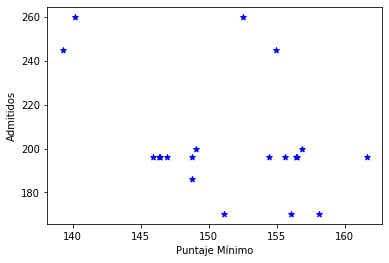

In [10]:
plt.xlabel('Puntaje Mínimo')
plt.ylabel('Admitidos')
plt.scatter(ing_comp_df[['PUNTAJE MINIMO']],ing_comp_df[['ADMITIDOS']],color='blue', marker='*')